In [1]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import time
from keras.optimizers import SGD
import re
import pandas as pd
import os
from PIL import Image
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv


font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)



In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# DATA TRAIN LOAD

train_data_dir = '/content/drive/Shareddrives/shared/projekt2/train_data_unlabeled'
X_train = []

progress = 0

# Custom sort key to properly sort by number
def sort_key(filename):
    number = re.search(r'\d+', filename).group()
    return int(number)

arr_indexes = []
# sort directory by number, then store images to an array
dir = sorted(os.listdir(train_data_dir), key=sort_key)
print('loading ' + str(len(dir)) + ' data of 16182 data')
for f in dir:
  if not f.startswith('.'):
    number = re.search(r'\d+', f).group()
    arr_indexes.append(int(number)-1)
    img = Image.open(os.path.join(train_data_dir, f))
    img_array = np.array(img)
    X_train.append(img_array)

loading 16182 data of 16182 data


In [7]:
# load train labels
train_labels_file = '/content/drive/Shareddrives/shared/projekt2/y_train.csv'
Y_train = pd.read_csv(train_labels_file, usecols=['target']).values

# disregard labels that are not present in dataset
Y_train = Y_train[arr_indexes]

In [8]:
# load test data

# Custom sort key to properly sort by number
def sort_key(filename):
    number = re.search(r'\d+', filename).group()
    return int(number)

test_data_dir = '/content/drive/Shareddrives/shared/projekt2/test_data_unlabeled'
X_test = []


# sort directory by number, then store images to an array
dir = sorted(os.listdir(test_data_dir), key=sort_key)
print('loading ' + str(len(dir)) + ' data of 4796 data')
for f in dir:
  if not f.startswith('.'):
    img = Image.open(os.path.join(test_data_dir, f))
    img_array = np.array(img)
    X_test.append(img_array)

loading 4796 data of 4796 data


In [4]:
# Show how much data is located on the drive

# Custom sort key to properly sort by number
def sort_key(filename):
    number = re.search(r'\d+', filename).group()
    return int(number)

test_data_dir = '/content/drive/Shareddrives/shared/projekt2/test_data_unlabeled'
train_data_dir = '/content/drive/Shareddrives/shared/projekt2/train_data_unlabeled'

dir = sorted(os.listdir(test_data_dir), key=sort_key)
print('test data: ' + str(len(dir)) + '/4796')

dir = sorted(os.listdir(train_data_dir), key=sort_key)
print('train data: ' + str(len(dir)) + '/16182')

test data: 4796
train data: 16182


In [9]:
# DATA PREPROCESSING

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255



Y = Y_train[:X_train.shape[0]]
# to onehot encoding
y_train_encoded = keras.utils.to_categorical(Y_train)

In [78]:
# Verify the shapes if you want


(3336, 45, 51, 4)

In [108]:

# MODEL ARCHITECTURE

model = Sequential()

model_no = 7


# Pure convolutional network
if model_no == 1:
  model.add(InputLayer(input_shape=(45,51,4)))
  model.add(Conv2D(32, (3,3)))
  model.add(MaxPooling2D(pool_size=(3,3)))
  model.add(Conv2D(8, (2,2)))
  model.add(Flatten(input_shape=(28,28,3)))
  model.add(Dense(4, activation='sigmoid'))
# Pure linear network
elif model_no == 2:
  model.add(Flatten(input_shape=(45, 51, 4)))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(4, activation='sigmoid'))
# Convolutional + linear network
elif model_no == 3: # pokus (best now)
  model.add(InputLayer(input_shape=(45,51,4)))
  model.add(Conv2D(64, (3,3)))
  model.add(MaxPooling2D(pool_size=(3,3)))
  model.add(Flatten())
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(16, activation='sigmoid'))
  model.add(Dense(4, activation='sigmoid'))
# Convolutional + linear network v2
elif model_no == 4: # pokus2
  model.add(InputLayer(input_shape=(45,51,4)))
  model.add(Conv2D(32, (3,3)))
  model.add(MaxPooling2D(pool_size=(3,3)))
  model.add(Flatten())
  model.add(Dense(16, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(4, activation='sigmoid'))
elif model_no == 5: # labels(4)
  model.add(InputLayer(input_shape=(45,51,4)))
  model.add(Conv2D(32, (2,2)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(16, activation='sigmoid'))
  model.add(Dense(4, activation='sigmoid'))
elif model_no == 6: # labels(4)
  model.add(InputLayer(input_shape=(45,51,4)))
  model.add(Conv2D(8, (2,2)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(16, activation='sigmoid'))
  model.add(Dense(4, activation='sigmoid'))
elif model_no == 7: # labels(4)
  model.add(InputLayer(input_shape=(45,51,4)))
  model.add(Conv2D(8, (3,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(4, (2,2)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(4, activation='sigmoid'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 43, 49, 8)         296       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 21, 24, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 23, 4)         132       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 10, 11, 4)         0         
 ng2D)                                                           
                                                                 
 flatten_21 (Flatten)        (None, 440)               0         
                                                                 
 dense_59 (Dense)            (None, 32)              

In [109]:

# MODEL COMPILE

loss = None
optimizer = None
metrics = None

opt = 'SDG'
rate = 0.03

match opt:

  case 'SDG':
    optimizer = SGD(learning_rate = rate)
  case 'Adam':
    optimizer = keras.optimizers.Adam(learning_rate = rate)
  case 'RMSprob':
    optimizer = keras.optimizers.RMSprop(learning_rate = rate)
  case 'Lion':
    optimizer = keras.optimizers.Lion(learning_rate = rate)
  case _ :
    optimizer = SGD(learning_rate = 0.01)



model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


###################################

In [110]:

# MODEL TRAIN

history = model.fit(X_train, y_train_encoded, epochs=30, batch_size=16, validation_split = 0.3)


Epoch 1/30
708/708 [==============================] - 5s 7ms/step - loss: 1.3335 - accuracy: 0.3332 - val_loss: 1.3076 - val_accuracy: 0.3361
Epoch 2/30
708/708 [==============================] - 5s 7ms/step - loss: 1.1578 - accuracy: 0.4806 - val_loss: 0.9089 - val_accuracy: 0.6797
Epoch 3/30
708/708 [==============================] - 4s 6ms/step - loss: 0.7373 - accuracy: 0.7193 - val_loss: 0.6369 - val_accuracy: 0.7539
Epoch 4/30
708/708 [==============================] - 4s 6ms/step - loss: 0.5765 - accuracy: 0.7774 - val_loss: 0.5412 - val_accuracy: 0.7953
Epoch 5/30
708/708 [==============================] - 5s 7ms/step - loss: 0.4938 - accuracy: 0.8151 - val_loss: 0.5020 - val_accuracy: 0.8019
Epoch 6/30
708/708 [==============================] - 4s 5ms/step - loss: 0.4354 - accuracy: 0.8334 - val_loss: 0.4287 - val_accuracy: 0.8385
Epoch 7/30
708/708 [==============================] - 4s 5ms/step - loss: 0.3894 - accuracy: 0.8554 - val_loss: 0.4028 - val_accuracy: 0.8501
Epoch 

In [111]:
# PREDICTION ON UNLABELED DATA

predictions = model.predict(X_test)

test_labels = [np.argmax(x) for x in predictions]

150/150 [==============================] - 1s 3ms/step


In [112]:
# Write result to a CSV file

id_array = np.array([str(i) for i in range(0, len(test_labels))])
target_array = np.array([str(i) for i in test_labels])

csv_content= zip(id_array, target_array)

# Specify the file name for the CSV file
csv_file = '/content/drive/Shareddrives/shared/projekt2/test_labels.csv'

# Write the data to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'target'])  # Write column headers
    writer.writerows(csv_content)  # Write rows of data

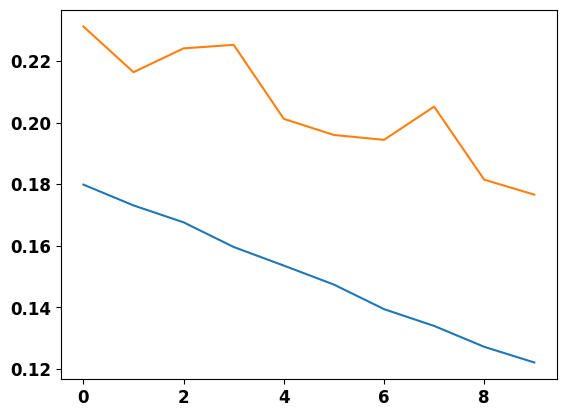

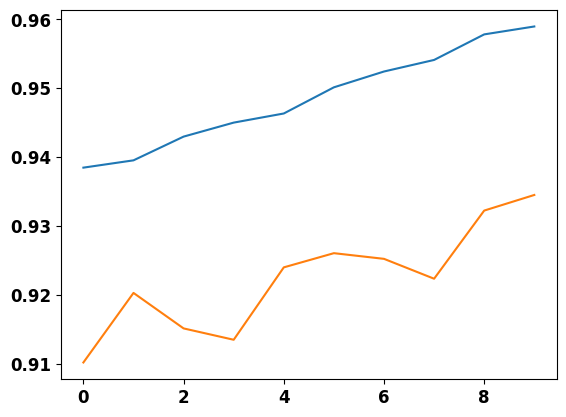

In [100]:
# PLOT

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
